<a href="https://colab.research.google.com/github/ericodle/music_classification_project/blob/main/wav_pre_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Script to check out the nature of your audio data

Heavily borrowed from https://towardsdatascience.com/get-to-know-audio-feature-extraction-in-python-a499fdaefe42

In [8]:
#Install and import dependencies

!pip install pydub
!pip install librosa
!pip install wave

import wave # Library for opening .wav file and read frames as bytes
import matplotlib.pyplot as plt
import numpy as np

from pydub import AudioSegment

%matplotlib inline

Import your wav file. On google colab, you can upload files from your computer using the "upload" feature under "Files" on the right. See (https://neptune.ai/blog/google-colab-dealing-with-files) for more details.

In [9]:
# Point to your file's path.
filepath = '/content/drive/MyDrive/b.wav'

In [10]:
### Use pydub to get some basic file details.

audio_segment = AudioSegment.from_file(filepath)
print("First, we can see some basic metrics about the audio file using the 'pydub' library. \n")

# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

First, we can see some basic metrics about the audio file using the 'pydub' library. 

Channels: 1
Sample width: 2
Frame rate (sample rate): 22050
Frame width: 2
Length (ms): 30013
Frame count: 661794.0
Intensity: -17.034980191401395


Use wave and matplotlib to graph the amplitude vs. time. This is a classic audio waveform you've surely seen before.

Now use the 'wave' library and matplotlib to show the amplitude vs. time graph of the audio file. 



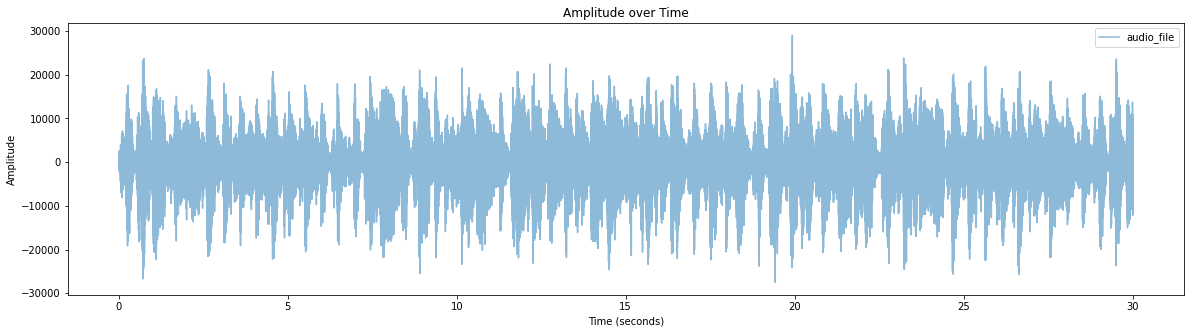

In [11]:
print("Now use the 'wave' library and matplotlib to show the amplitude vs. time graph of the audio file. \n")
sf_filewave = wave.open(filepath, 'r')
signal_sf = sf_filewave.readframes(-1)
# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()
# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                      stop=len(soundwave_sf)/framerate_sf,
                      num=len(soundwave_sf))

# Set up plot
f, ax = plt.subplots(figsize=(20, 5))
# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
# Add the audio data to the plot
ax = plt.plot(time_sf, soundwave_sf, label='audio_file', alpha=0.5)

plt.legend()
plt.show()


Use Librosa to generate a spectrogram.

Using the short-time Fourier transform, we can generate a frequency vs. time heat map. 



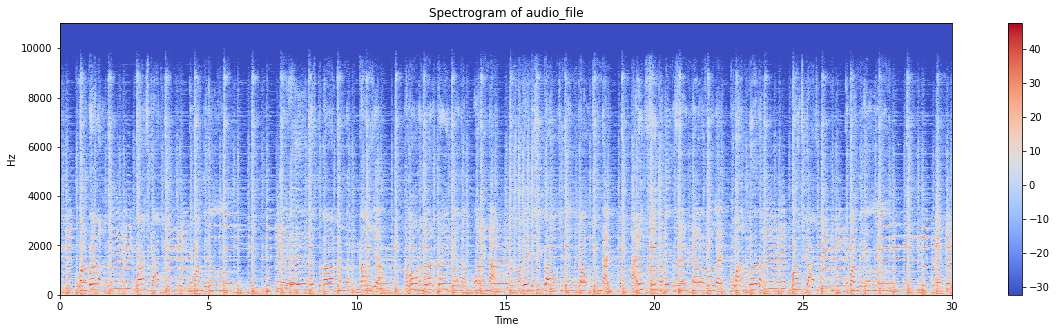

In [12]:
print("Using the short-time Fourier transform, we can generate a frequency vs. time heat map. \n")
import librosa.display
x, sr = librosa.load(filepath)
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram of audio_file')
plt.ylabel('Hz')
plt.xlabel('Time')
plt.show()

Calculate Root Mean Square (RMS) to calculate energy

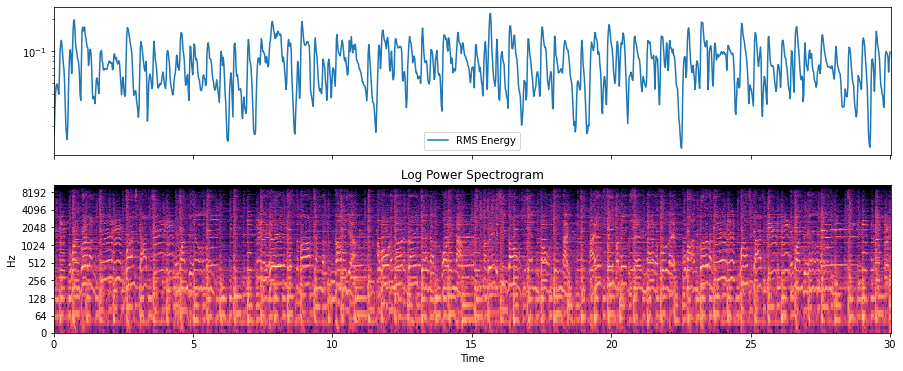

In [13]:
y, sr = librosa.load(filepath)
# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Log Power Spectrogram')
plt.show()

Zero Crossing Rate (ZCR) calculation

The Zero Crossing Rate (ZCR) is another metric that can be useful in audio analysis. 

Zero crossing rate: 55032


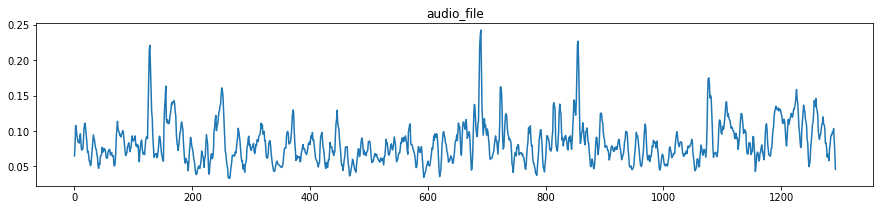

In [14]:
print("The Zero Crossing Rate (ZCR) is another metric that can be useful in audio analysis. \n")
y, sr = librosa.load(filepath)
zcrs = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
plt.figure(figsize=(15, 3))
plt.plot(zcrs[0])
plt.title('audio_file')
plt.show()

MFCC calculation

MFCC array:
[[-211.48465    -208.94481    -193.90889    ... -109.999146
   -86.84641     -79.03764   ]
 [  99.02297     101.24678     102.24396    ...  150.07935
   138.89685     140.24707   ]
 [ -10.634697     -9.346699      1.9154351  ...  -50.795135
   -36.61398     -31.443943  ]
 ...
 [   8.944412      6.882745      3.6500254  ...   -2.8571541
    -6.2547865    -0.48850513]
 [   3.0748527     4.566725      4.7889986  ...   -7.574688
    -8.440062     -7.880659  ]
 [   5.0415277     2.8966317     0.9402479  ...   -7.555337
     0.2906964     2.6588178 ]]


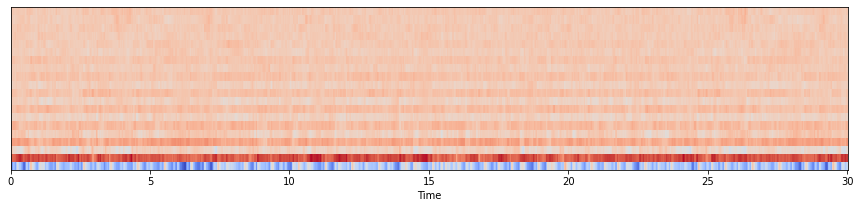

In [17]:
x, sr = librosa.load(filepath)
mfccs = librosa.feature.mfcc(x, sr=sr)
print("MFCC array:")
print(mfccs)

# Displaying MFCCs:
plt.figure(figsize=(15, 3))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

Calculate Chroma graph

A Chroma graph shows dominant musical tones vs. time.


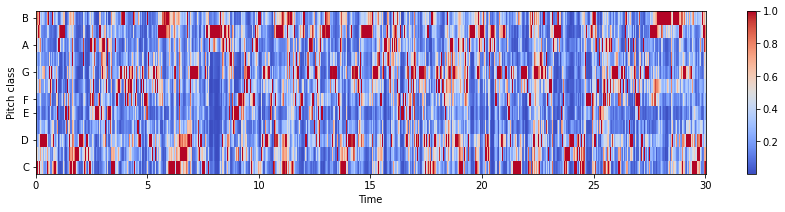

In [18]:
print("A Chroma graph shows dominant musical tones vs. time.")

x, sr = librosa.load(filepath)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
fig.colorbar(img, ax=ax)
plt.show()

Calculate tempo

In [19]:
print("A tempogram visualizes how tempo varies across time.")
y, sr = librosa.load(filepath)
hop_length = 512
# Compute local onset autocorrelation
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

print("Estimated tempo (beats per minute):")
print(tempo)

A tempogram visualizes how tempo varies across time.
Estimated tempo (beats per minute):
123.046875


Thanks for using this script.